We have a dataset that shows which users have purchased an iPhone. Our goal in this project is to predict if the customer will purchase an iPhone or not given their gender, age and salary.


The data set is stored in the file "iphone_purchase_records.csv". You should split the at 70/30, but other choices can be accepted too.


# Exercise 1

Your task is to build a classifier using Naive Bayes algorithm and obtain the accuracy. 


In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv('./data/iphone_purchase_records.csv')

In [50]:
data.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


# Exercise 2

Select 2-3 other classifiers, and compare their performance with Naive Bayes.


In [51]:
# Select for first 3 columns for X, and Y for column 4 
X = data.iloc[:,:-1].values
y = data.iloc[:, 3].values

display(type(X))
display(type(y))
display(X)
display(y)

numpy.ndarray

numpy.ndarray

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [52]:
# OK, let's convert Gender to number 

from sklearn.preprocessing import LabelEncoder

LE_gender =  LabelEncoder()
X[:,0] = LE_gender.fit_transform(X[:,0])

In [53]:
X[:,0]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [54]:
# now, split data for train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Let's use DecisionTreeClassifier



In [55]:
### USING DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=30)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

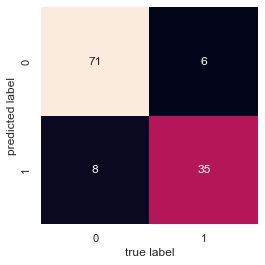

In [56]:
# Create the Confusion Matrix and Evaluate the accuracy

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [57]:
# Print details as well

from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_sdt = precision_score(y_test, y_pred, average='macro')
print('precision score: {0:f}'.format (precision_sdt))

recall_sdt = recall_score(y_test,y_pred, average='macro')
print('recall score: {0:f}'.format (recall_sdt))

score_dt = accuracy_score(y_test,dt.predict(X_test))
print('Accuracy:{0:f}'.format(score_dt))

precision score: 0.868016
recall score: 0.876196
Accuracy:0.883333


## Let's use RandomForest



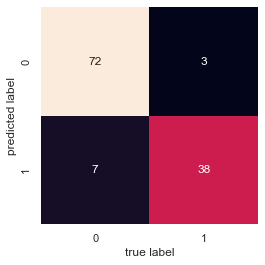

In [58]:
from sklearn.ensemble import RandomForestClassifier 

randomf = RandomForestClassifier(min_samples_leaf=30, n_estimators=70, n_jobs=-1, oob_score=True)

randomf.fit(X_train, y_train)

y_pred = randomf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [59]:
precision_rf = precision_score(y_test, y_pred, average='macro')
print('precision score: {0:f}'.format (precision_rf))

recall_rf = recall_score(y_test,y_pred, average='macro')
print('recall score: {0:f}'.format (recall_rf))

score_rf = accuracy_score(y_test,randomf.predict(X_test))
print('Accuracy:{0:f}'.format(score_rf))

precision score: 0.902222
recall score: 0.919111
Accuracy:0.916667


## Let's use Naive Bayes



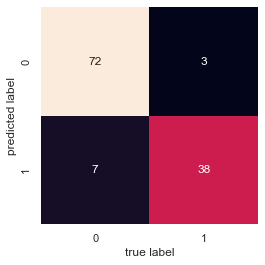

In [60]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = randomf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [61]:
precision_nb = precision_score(y_test, y_pred, average='macro')
print('precision score: {0:f}'.format (precision_nb))

recall_nb = recall_score(y_test,y_pred, average='macro')
print('recall score: {0:f}'.format (recall_nb))

score_nb = accuracy_score(y_test,nb.predict(X_test))
print('Accuracy:{0:f}'.format(score_nb))

precision score: 0.902222
recall score: 0.919111
Accuracy:0.891667


In [62]:
type(X_test)
X_test

array([[1, 30, 87000],
       [0, 38, 50000],
       [1, 35, 75000],
       [0, 30, 79000],
       [0, 35, 50000],
       [1, 27, 20000],
       [0, 31, 15000],
       [1, 36, 144000],
       [0, 18, 68000],
       [1, 47, 43000],
       [1, 30, 49000],
       [0, 28, 55000],
       [1, 37, 55000],
       [1, 39, 77000],
       [1, 20, 86000],
       [0, 32, 117000],
       [1, 37, 77000],
       [1, 19, 85000],
       [0, 55, 130000],
       [1, 35, 22000],
       [0, 35, 47000],
       [0, 47, 144000],
       [0, 41, 51000],
       [1, 47, 105000],
       [0, 23, 28000],
       [0, 49, 141000],
       [0, 28, 87000],
       [1, 29, 80000],
       [0, 37, 62000],
       [0, 32, 86000],
       [1, 21, 88000],
       [1, 37, 79000],
       [1, 57, 60000],
       [1, 37, 53000],
       [1, 24, 58000],
       [1, 18, 52000],
       [1, 22, 81000],
       [0, 34, 43000],
       [0, 31, 34000],
       [0, 49, 36000],
       [1, 27, 88000],
       [1, 41, 52000],
       [0, 27, 84000],
     

## Optional Exercise

Use t-test to justify whether a classifier is really better than the other.

Text(89.18, 0.5, 'Predicted')

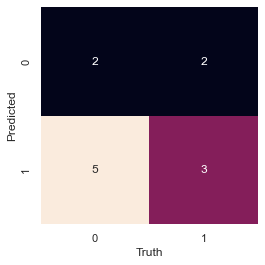

In [64]:
import numpy as np

myXtest = [[1,50,8000],[0,30,10000],[0, 35, 47000],[0, 45, 44000],[1, 40, 31000],
       [1, 47, 105000],[0, 23, 28000],[0, 35, 47000],[0, 45, 124000],[0, 49, 71000],[1, 57, 185000],[1, 33, 38000]]
myYtest = [[1],[0],[1],[1],[0],[1],[1],[1],[0],[1],[0],[1]]

#  Use Gaussian Classifier
#model = GaussianNB()
nb = GaussianNB()

# Train the model 
nb.fit(X_train, y_train)

# Predict Output with t-test data
y_predicted = nb.predict(myXtest)

# Plot Confusion Matrix
mat = confusion_matrix(y_predicted, myYtest)
#names = np.unique(y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [65]:
accuracy_score(myYtest, y_predicted) 

0.4166666666666667

In [68]:
precision_nb = precision_score(myYtest, y_predicted, average='macro')
print('precision score: {0:f}'.format (precision_nb))

recall_nb = recall_score(myYtest,y_predicted, average='macro')
print('recall score: {0:f}'.format (recall_nb))

score_nb = accuracy_score(myYtest,nb.predict(myXtest))
print('Accuracy:{0:f}'.format(score_nb))

precision score: 0.442857
recall score: 0.437500
Accuracy:0.416667


## Or, load test data from csv


C:\Users\TUCK_W~1\AppData\Local\Temp/ipykernel_32360/399072955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata.Gender[testdata.Gender == 'Male'] = 1
C:\Users\TUCK_W~1\AppData\Local\Temp/ipykernel_32360/399072955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata.Gender[testdata.Gender == 'Female'] = 0


Text(89.18, 0.5, 'Predicted')

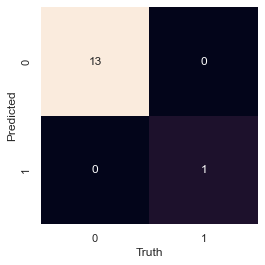

In [104]:
testdata = pd.read_csv('./data/iphone_purchase_records_testdata.csv')

testdata.Gender[testdata.Gender == 'Male'] = 1
testdata.Gender[testdata.Gender == 'Female'] = 0

# get xtest and ytest only Array Values from df
xtest = testdata.drop('Purchase Iphone', axis=1).values
ytest = testdata.loc[:, 'Purchase Iphone'].values

nb = GaussianNB()

# Train the model 
nb.fit(X_train, y_train)

# Predict Output with t-test data
y_predicted = nb.predict(xtest)

# Plot Confusion Matrix
mat = confusion_matrix(y_predicted, ytest)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('Truth')
plt.ylabel('Predicted')




In [107]:
display(xtest)
#display(xtest_n)

array([[1, 29, 12000],
       [1, 15, 23000],
       [0, 16, 49000],
       [0, 26, 57000],
       [1, 16, 36000],
       [1, 28, 38000],
       [0, 22, 82000],
       [0, 33, 120000],
       [1, 29, 73000],
       [0, 25, 45000],
       [0, 28, 90000],
       [0, 29, 42000],
       [1, 30, 76000],
       [1, 32, 18000]], dtype=object)

In [105]:
#xtest_n = xtest.to_numpy()
#ytest_n = ytest.to_numpy()
#score_nb = accuracy_score(ytest_n,nb.predict(xtest_n))
#print('Accuracy:{0:f}'.format(score_nb))

score_nb = accuracy_score(ytest,nb.predict(xtest))
print('Accuracy:{0:f}'.format(score_nb))

Accuracy:1.000000
